# Context

In this notebook we will do a data correlation

# Load packages

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import warnings
warnings.simplefilter("ignore")


# Load data and check

using relative paths

In [197]:
df = pd.read_excel('../Data/output_data/hallazgos_clean.xlsx').iloc[:,1:]
df.head(5)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,fecha_desembolso,visita_analista_credito,categoria,hallazgo,tipo_hallazgo,calificacion_cartera,relaciones_laborales,oficina,zona,regional,estado,year,tipo,riesgo,riesgo_int
0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros,15069268,792642,36,2021-06-11,NaT,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,Si,Si,dosquebradas,12,4,cancelada,2022,afecta estabilidad,1 - Alto,1
1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,2021-06-15,2021-06-08,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,No,Si,poblado,1,1,castigo,2022,afecta estabilidad,1 - Alto,1
2,Jose Armando Agudelo Gomez,HZT,No_especificado,gallera_trebol,otros,1433360,178915,15,2022-10-02,2022-02-10,habilidad_empresarial,dudas sobre propiedad del negocio,fallas en la metodologia,Si,no_especificado,chaparral,11,4,cancelada,2022,afecta estabilidad,1 - Alto,1
3,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,2022-05-03,NaT,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,Si,Si,dosquebradas,12,4,modificado,2022,afecta estabilidad,1 - Alto,1
4,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,otros,1055378,205648,6,2022-03-11,2022-03-05,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,Si,no_especificado,tulua,3,1,cancelada,2022,afecta estabilidad,1 - Alto,1


In [198]:
df.columns  

Index(['cliente', 'analista', 'tipo_credito', 'actividad', 'actividad_v2',
       'monto', 'cuota', 'plazo', 'fecha_desembolso',
       'visita_analista_credito', 'categoria', 'hallazgo', 'tipo_hallazgo',
       'calificacion_cartera', 'relaciones_laborales', 'oficina', 'zona',
       'regional', 'estado', 'year', 'tipo', 'riesgo', 'riesgo_int'],
      dtype='object')

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3005 entries, 0 to 3004
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cliente                  3004 non-null   object        
 1   analista                 3005 non-null   object        
 2   tipo_credito             3005 non-null   object        
 3   actividad                3005 non-null   object        
 4   actividad_v2             3005 non-null   object        
 5   monto                    3005 non-null   int64         
 6   cuota                    3005 non-null   int64         
 7   plazo                    3005 non-null   int64         
 8   fecha_desembolso         3002 non-null   datetime64[ns]
 9   visita_analista_credito  2194 non-null   datetime64[ns]
 10  categoria                3005 non-null   object        
 11  hallazgo                 3005 non-null   object        
 12  tipo_hallazgo            3005 non-

In [200]:
df.isna().sum().sort_values(ascending=False)            

visita_analista_credito    811
fecha_desembolso             3
cliente                      1
calificacion_cartera         0
riesgo                       0
tipo                         0
year                         0
estado                       0
regional                     0
zona                         0
oficina                      0
relaciones_laborales         0
hallazgo                     0
tipo_hallazgo                0
analista                     0
categoria                    0
plazo                        0
cuota                        0
monto                        0
actividad_v2                 0
actividad                    0
tipo_credito                 0
riesgo_int                   0
dtype: int64

# Correlation analysis

In this part of the analysis, We want to make a correlation analysis, for do this We need to drop and transform data that can be helpull for us, so in the first part we make a little trial to prove what variables can be transformed related with his importance and his unique records, then We drop and encoded that variables that can be useful

In [201]:
df.columns

Index(['cliente', 'analista', 'tipo_credito', 'actividad', 'actividad_v2',
       'monto', 'cuota', 'plazo', 'fecha_desembolso',
       'visita_analista_credito', 'categoria', 'hallazgo', 'tipo_hallazgo',
       'calificacion_cartera', 'relaciones_laborales', 'oficina', 'zona',
       'regional', 'estado', 'year', 'tipo', 'riesgo', 'riesgo_int'],
      dtype='object')

In [202]:
print('We will cast the "zona" and "regional" columns as objects columns, because these are nominal category columns')
df.zona = df.zona.astype(object)
df.regional = df.regional.astype(object)

We will cast the "zona" and "regional" columns as objects columns, because these are nominal category columns


In [203]:
print("Object columns - number of unique values:\n")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()}")


Object columns - number of unique values:

cliente: 3003
analista: 394
tipo_credito: 4
actividad: 1909
actividad_v2: 16
categoria: 15
hallazgo: 79
tipo_hallazgo: 5
calificacion_cartera: 2
relaciones_laborales: 3
oficina: 62
zona: 17
regional: 5
estado: 7
tipo: 4
riesgo: 4


In [204]:
# Objective column

print(df.riesgo.value_counts())
print("\nCast as integer, because is a ordinal category:\n")
print(df.riesgo_int.value_counts())

2 - Medio    1117
4 - Otro     1112
3 - Bajo      430
1 - Alto      346
Name: riesgo, dtype: int64

Cast as integer, because is a ordinal category:

2    1117
4    1112
3     430
1     346
Name: riesgo_int, dtype: int64


In [205]:

print("Drop some columns that doesnt help to analyze nor predict the risk level of credits")
print("Several tags are calculated o filled just after an audit.")
print("We want to work with info that we could know in advance, before an audit.")

df_corr = df.copy()
df_corr = df_corr.drop(columns=['cliente'])
df_corr = df_corr.drop(columns=['analista'])
df_corr = df_corr.drop(columns=['actividad'])
df_corr = df_corr.drop(columns=['categoria'])
df_corr = df_corr.drop(columns=['hallazgo'])
df_corr = df_corr.drop(columns=['fecha_desembolso'])
df_corr = df_corr.drop(columns=['visita_analista_credito'])
df_corr = df_corr.drop(columns=['tipo_hallazgo'])
df_corr = df_corr.drop(columns=['tipo'])
df_corr = df_corr.drop(columns=['oficina'])
df_corr = df_corr.drop(columns=['year'])
df_corr = df_corr.drop(columns=['riesgo']) # we will use the integer risk column
df_corr = df_corr.drop(columns=['estado'])
df_corr = df_corr.drop(columns=['calificacion_cartera'])

# re-order the columns
cols = ['riesgo_int'] + [col for col in df_corr.columns if col != 'riesgo_int']
df_corr = df_corr[cols]

df_corr_v2 = df_corr.copy()

print("\nColumns to correlation analysis:")
print(df_corr.columns.tolist())

Drop some columns that doesnt help to analyze nor predict the risk level of credits
Several tags are calculated o filled just after an audit.
We want to work with info that we could know in advance, before an audit.

Columns to correlation analysis:
['riesgo_int', 'tipo_credito', 'actividad_v2', 'monto', 'cuota', 'plazo', 'relaciones_laborales', 'zona', 'regional']


In [206]:
df_corr.dtypes

riesgo_int               int64
tipo_credito            object
actividad_v2            object
monto                    int64
cuota                    int64
plazo                    int64
relaciones_laborales    object
zona                    object
regional                object
dtype: object

correlation between risk level (1 high risk - 4 no risk) and some columns:

                                      riesgo_int
relaciones_laborales_Si                -0.541517
regional_1                             -0.160064
tipo_credito_No_especificado           -0.119421
relaciones_laborales_no_especificado   -0.095294
regional_3                             -0.041567
tipo_credito_Nuevo                     -0.037929
plazo                                  -0.005854
monto                                   0.007560
cuota                                   0.008020
tipo_credito_Renovacion                 0.031183
regional_5                              0.037678
regional_2                              0.066473
tipo_credito_Preferencial               0.068531
regional_4                              0.116295
relaciones_laborales_No                 0.469166
riesgo_int                              1.000000
----
GENERAL CORRELATION


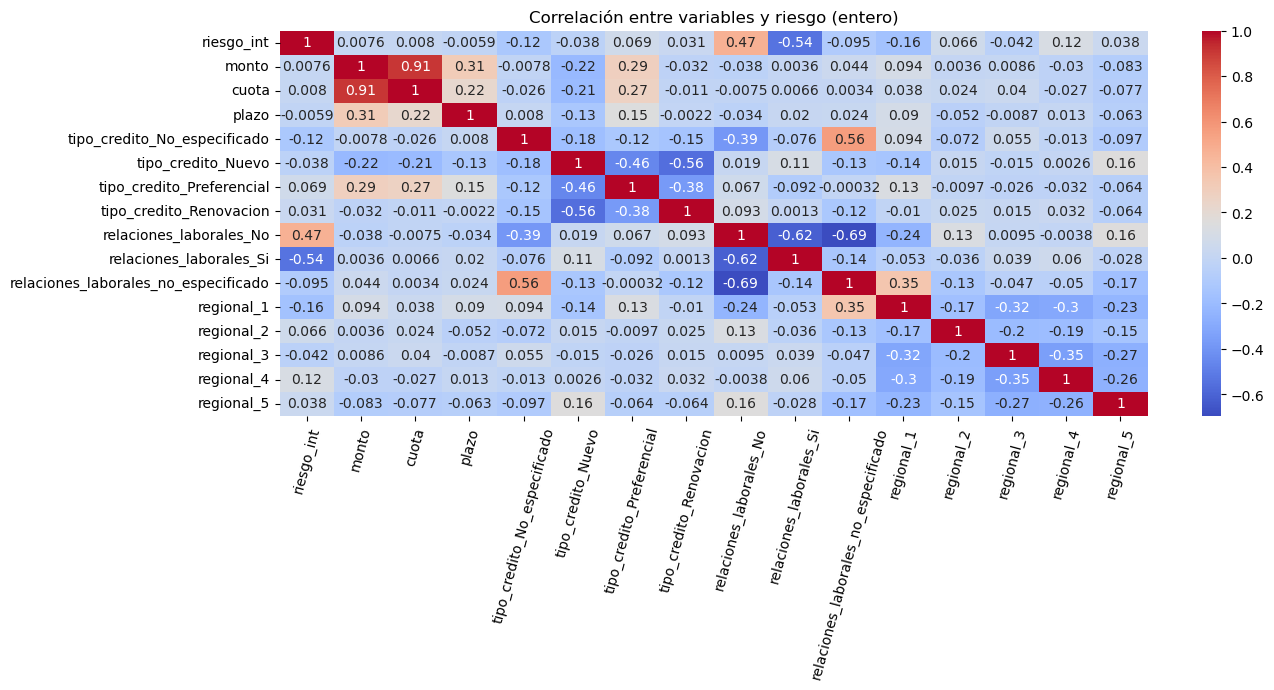

In [207]:
print("correlation between risk level (1 high risk - 4 no risk) and some columns:\n")

df_corr_v1 = df_corr.copy()
df_corr_v1 = df_corr_v1.drop(columns=['actividad_v2'])
df_corr_v1 = df_corr_v1.drop(columns=['zona'])
df_corr_v1 = pd.get_dummies(df_corr_v1,drop_first=False)
print(pd.DataFrame(df_corr_v1.corr().loc[:,"riesgo_int"]).sort_values(by="riesgo_int"))
print("----\nGENERAL CORRELATION")

plt.figure(figsize=(14,5))

df_corr_v1 = df_corr.copy()
df_corr_v1 = df_corr_v1.drop(columns=['actividad_v2'])
df_corr_v1 = df_corr_v1.drop(columns=['zona'])
df_corr_v1 = pd.get_dummies(df_corr_v1,drop_first=False)

sns.heatmap(df_corr_v1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables y riesgo (entero)')
plt.xticks(rotation=75)
plt.show()

In [190]:
print("correlation between risk level (1 high risk - 4 no risk) and 'zona':\n")

df_corr_v2 = df_corr[["riesgo_int","zona"]].copy()
df_corr_v2 = pd.get_dummies(df_corr_v2,drop_first=False)
print(pd.DataFrame(df_corr_v2.corr().loc[:,"riesgo_int"]).sort_values(by="riesgo_int"))


correlation between risk level (1 high risk - 4 no risk) and 'zona':

            riesgo_int
zona_1       -0.127248
zona_16      -0.089652
zona_8       -0.073765
zona_10      -0.064277
zona_6       -0.057552
zona_14      -0.046896
zona_3       -0.046547
zona_7       -0.035810
zona_11      -0.026602
zona_2       -0.023541
zona_9       -0.018071
zona_15       0.029725
zona_4        0.039794
zona_13       0.068351
zona_17       0.073451
zona_5        0.088787
zona_12       0.192611
riesgo_int    1.000000


In [191]:
print("correlation between risk level (1 high risk - 4 no risk) and 'actividad':\n")

df_corr_v2 = df_corr[["riesgo_int","actividad_v2"]].copy()
df_corr_v2 = pd.get_dummies(df_corr_v2,drop_first=False)
print(pd.DataFrame(df_corr_v2.corr().loc[:,"riesgo_int"]).sort_values(by="riesgo_int"))

correlation between risk level (1 high risk - 4 no risk) and 'actividad':

                                                 riesgo_int
actividad_v2_otros                                -0.043753
actividad_v2_comercio_y_ventas_general            -0.029218
actividad_v2_agricultura_ganaderia_y_afines       -0.021484
actividad_v2_servicios_de_limpieza                -0.012590
actividad_v2_salud_y_afines                       -0.004709
actividad_v2_tiendas_y_almacenes_varios           -0.003550
actividad_v2_construccion_obras_y_afines           0.000876
actividad_v2_belleza_y_estetica                    0.001657
actividad_v2_transporte_y_vehiculos                0.006228
actividad_v2_oficios_tecnicos_y_manuales           0.009703
actividad_v2_sector_alimenticio                    0.015985
actividad_v2_arriendos_alquiler_e_inmobiliarios    0.017683
actividad_v2_servicios_educativos                  0.020465
actividad_v2_confeccion_y_afines                   0.023322
actividad_v2_comercio_amb

## 2nd version

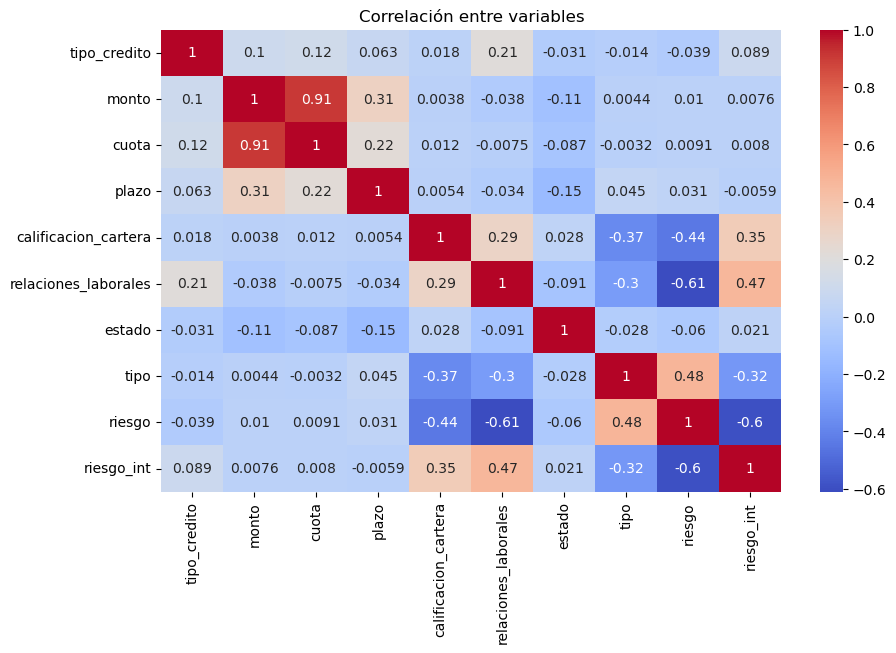

In [192]:
## correlation analysis 

le = LabelEncoder()
ho = OneHotEncoder(sparse_output=False)
df_corr = df.copy()
df_corr = df_corr.drop(columns=['cliente'])
df_corr = df_corr.drop(columns=['analista'])
df_corr['tipo_credito'] = le.fit_transform(df_corr['tipo_credito'])
df_corr = df_corr.drop(columns=['actividad'])
df_corr = df_corr.drop(columns=['actividad_v2'])
df_corr = df_corr.drop(columns=['categoria'])
df_corr = df_corr.drop(columns=['hallazgo'])
df_corr = df_corr.drop(columns=['fecha_desembolso'])
df_corr = df_corr.drop(columns=['visita_analista_credito'])
df_corr = df_corr.drop(columns=['tipo_hallazgo'])
df_corr['riesgo'] = ho.fit_transform(df_corr[['riesgo']])
df_corr['calificacion_cartera'] = ho.fit_transform(df_corr[['calificacion_cartera']])
df_corr['relaciones_laborales'] = ho.fit_transform(df_corr[['relaciones_laborales']])
df_corr['tipo'] = ho.fit_transform(df_corr[['tipo']])
df_corr = df_corr.drop(columns=['oficina'])
df_corr = df_corr.drop(columns=['zona'])
df_corr['estado'] = ho.fit_transform(df_corr[['estado']])
df_corr = df_corr.drop(columns=['year'])
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

We drop variables that no were relevants for our analisys like name, zone, office that are personal names that can't contribute to our analisys; year, that is only a record; category, findings, type of finding, because we don't know nothing about this variables before of the auditory.

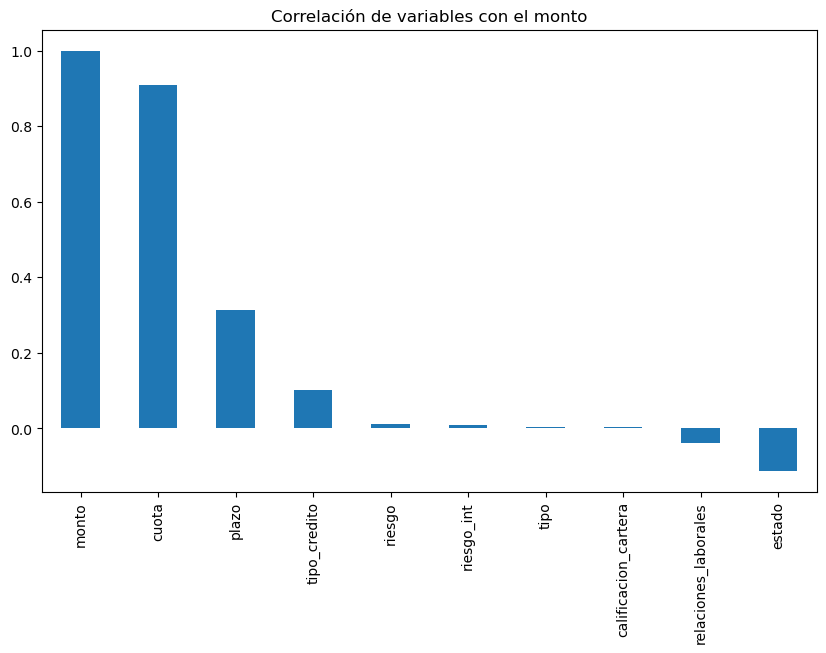

In [193]:
plt.figure(figsize=(10,6))
df_corr.corr()['monto'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación de variables con el monto')
plt.show()

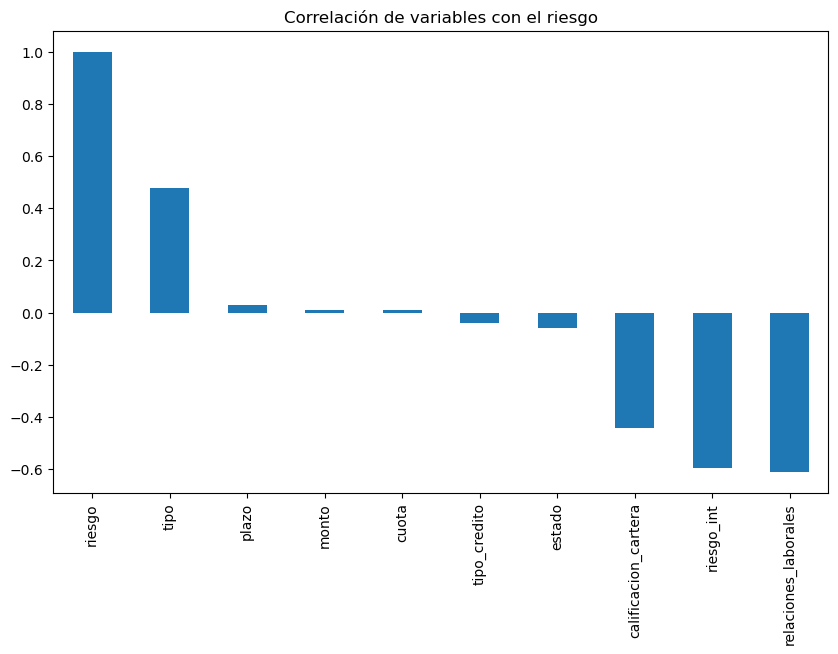

In [194]:
plt.figure(figsize=(10,6))
df_corr.corr()['riesgo'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlación de variables con el riesgo')
plt.show()